# Concrete Slump Test Regression

The concrete slump test measures the consistency of fresh concrete before it sets. It is performed to check the workability of freshly made concrete, and therefore the ease with which concrete flows. It can also be used as an indicator of an improperly mixed batch.

<img src="https://i0.wp.com/civiconcepts.com/wp-content/uploads/2019/08/Slump-Cone-test-of-concrete.jpg?fit=977%2C488&ssl=1">

Our data set consists of various cement properties and the resulting slump test metrics in cm. Later on the set concrete is tested for its compressive strength 28 days later.

Input variables (9):

(component kg in one M^3 concrete)(7):
* Cement
* Slag
* Fly ash
* Water
* SP
* Coarse Aggr.
* Fine Aggr.

(Measurements)(2)
* SLUMP (cm)
* FLOW (cm)

Target variable (1):
* **28-day Compressive Strength (Mpa)**

Data Source: https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test

*Credit: Yeh, I-Cheng, "Modeling slump flow of concrete using second-order regressions and artificial neural networks," Cement and Concrete Composites, Vol.29, No. 6, 474-480, 2007.*

# Importing dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Loading data

In [2]:
df = pd.read_csv("cement_slump.csv")

# EDA and Graphical analysis

In [3]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.000,82.000,105.000,210.000,9.000,904.000,680.000,23.000,62.000,34.990
1,163.000,149.000,191.000,180.000,12.000,843.000,746.000,0.000,20.000,41.140
2,162.000,148.000,191.000,179.000,16.000,840.000,743.000,1.000,20.000,41.810
3,162.000,148.000,190.000,179.000,19.000,838.000,741.000,3.000,21.500,42.080
4,154.000,112.000,144.000,220.000,10.000,923.000,658.000,20.000,64.000,26.820


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


<AxesSubplot:>

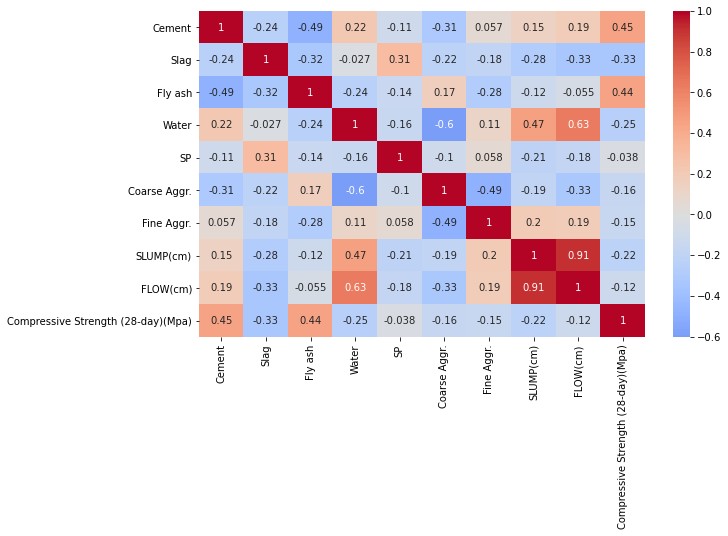

In [5]:
sns.heatmap(df.corr(), cmap="coolwarm", center=0, annot=True)

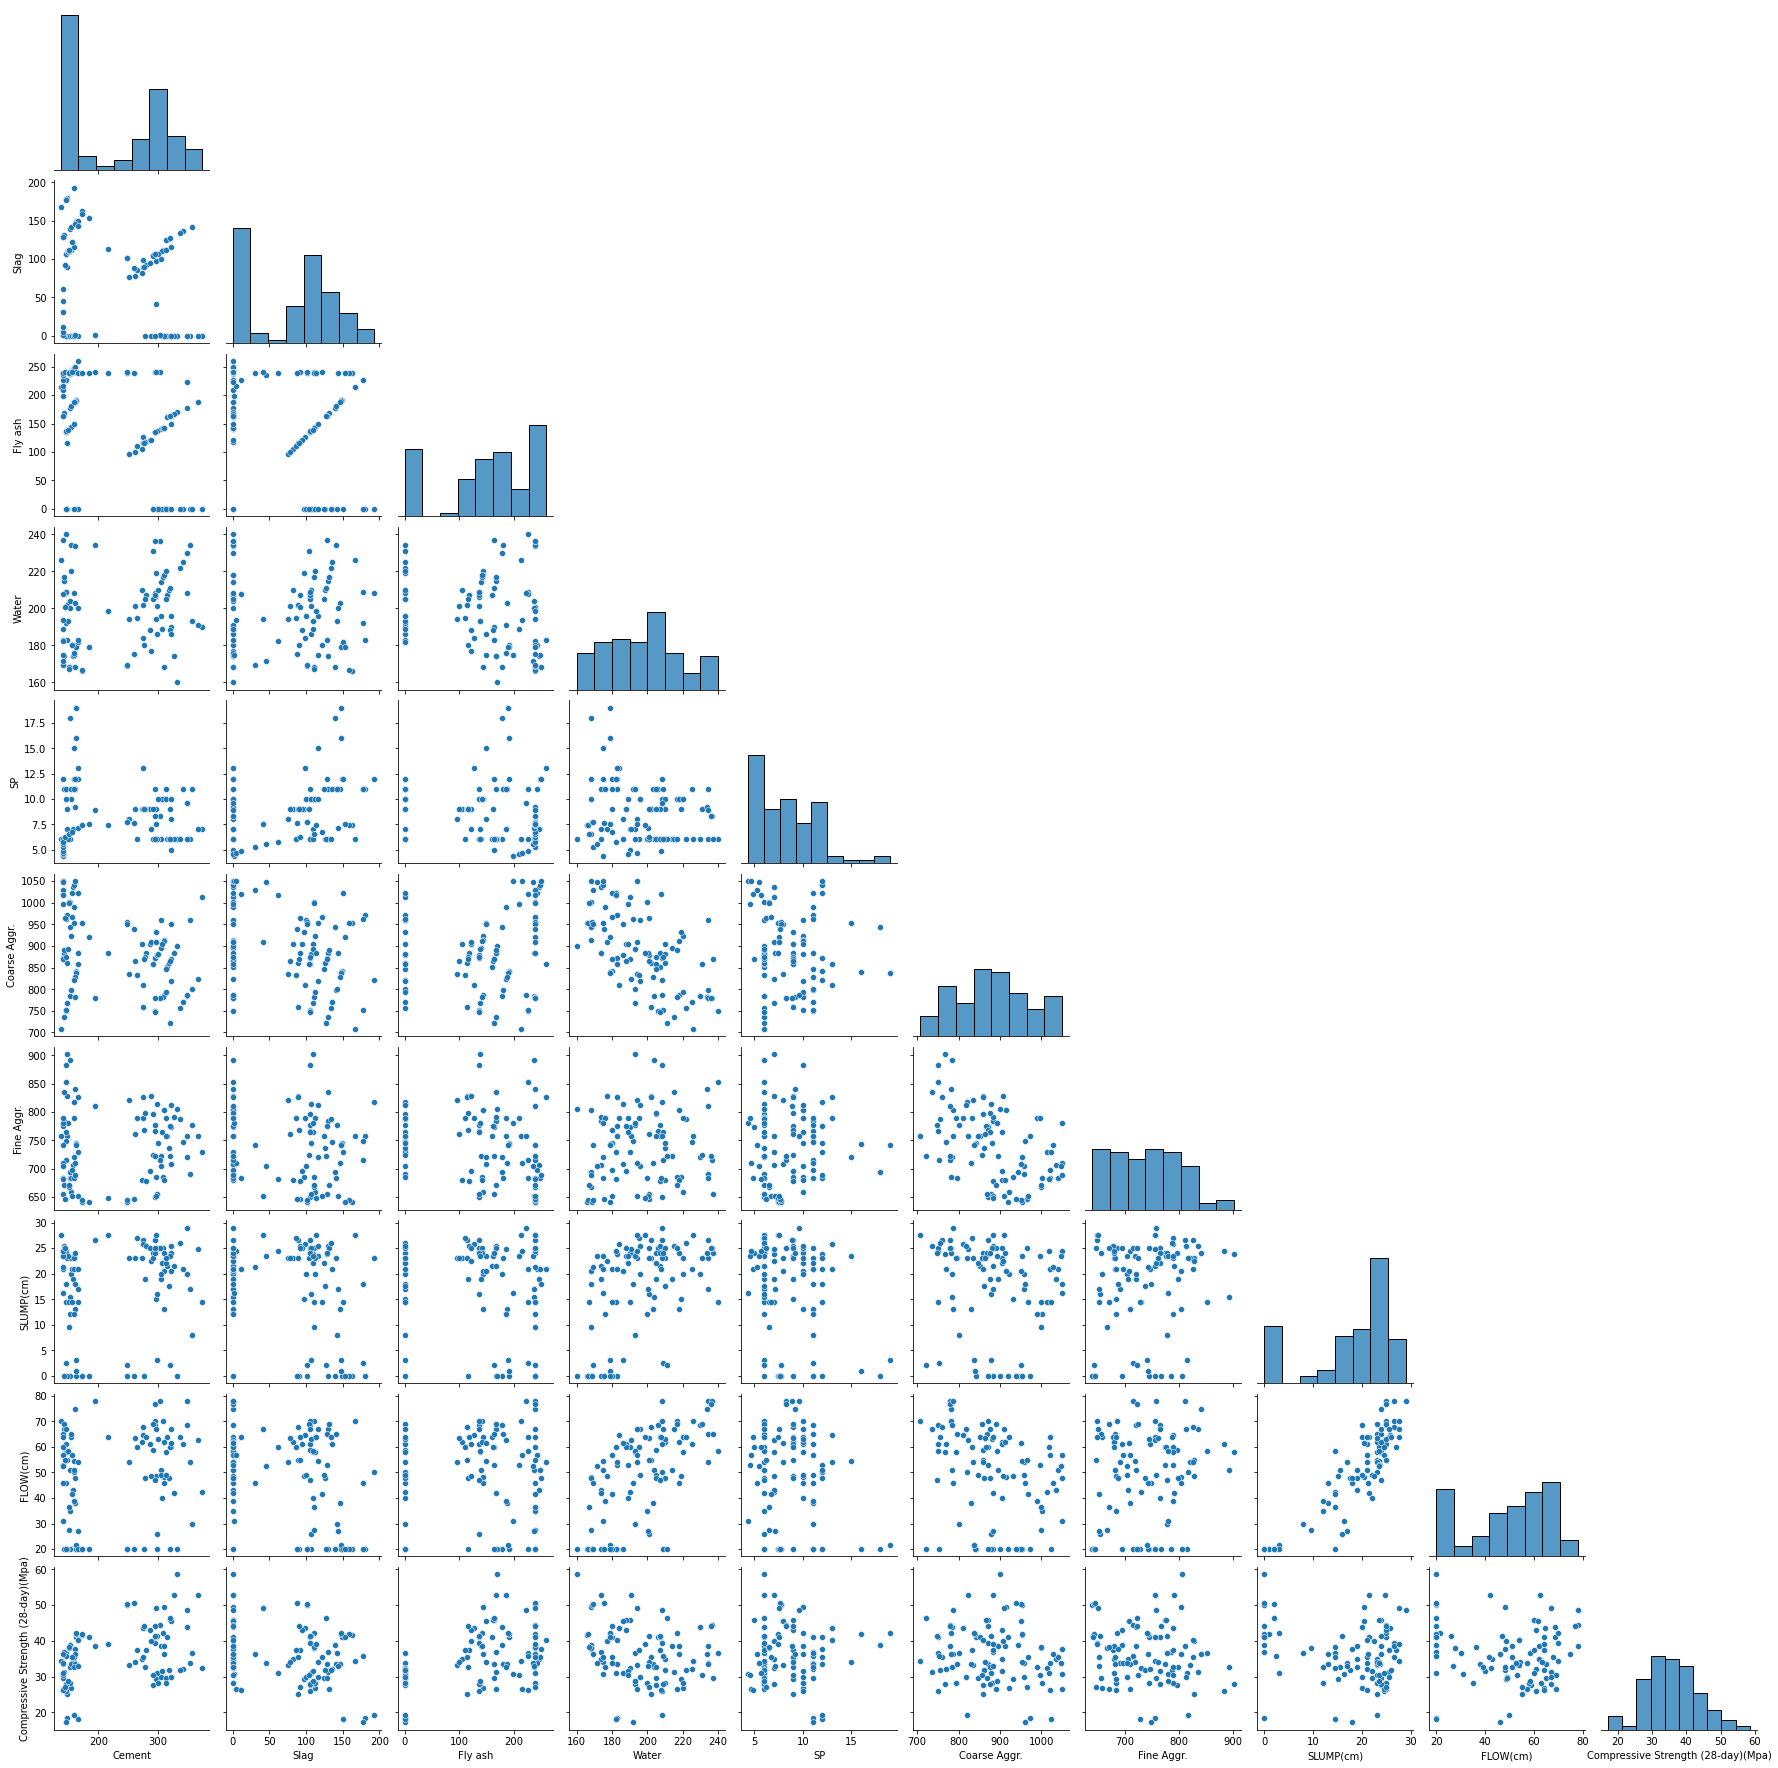

In [6]:
sns.pairplot(df, corner=True);

# Data Preprocessing 

### Features and target variable

In [7]:
X = df.drop("Compressive Strength (28-day)(Mpa)",axis=1)
y = df["Compressive Strength (28-day)(Mpa)"]

In [8]:
X.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm)
0,273.000,82.000,105.000,210.000,9.000,904.000,680.000,23.000,62.000
1,163.000,149.000,191.000,180.000,12.000,843.000,746.000,0.000,20.000
2,162.000,148.000,191.000,179.000,16.000,840.000,743.000,1.000,20.000
3,162.000,148.000,190.000,179.000,19.000,838.000,741.000,3.000,21.500
4,154.000,112.000,144.000,220.000,10.000,923.000,658.000,20.000,64.000


In [9]:
y.head()

0   34.990
1   41.140
2   41.810
3   42.080
4   26.820
Name: Compressive Strength (28-day)(Mpa), dtype: float64

### Splitting data into training and testing

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42)

In [12]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (72, 9)
Train target shape   :  (72,)
Test features shape  :  (31, 9)
Test target shape    :  (31,)


## Scaling

In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler = StandardScaler()

In [14]:
scaler.fit(X_train)

StandardScaler()

In [15]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[-1.01867817e+00,  4.89060387e-01, -7.01085388e-02,
        -1.99267756e-01, -5.39878038e-01, -1.37532719e+00,
         2.52572977e+00,  6.48505379e-01,  4.82444362e-01],
       [ 8.52113706e-01, -6.26114653e-01,  1.06779252e+00,
        -1.50862633e-01, -3.67117066e-01,  2.75612237e-01,
        -1.40263561e+00,  1.08244950e+00,  9.92185022e-01],
       [-8.80658652e-01,  1.86460669e+00, -1.63768284e+00,
         5.26809088e-01,  1.18773168e+00, -7.54320879e-01,
         1.20685410e+00,  5.61716555e-01,  2.93415534e-02],
       [ 8.63406212e-01,  4.56309284e-01, -9.26635646e-02,
         1.87973228e-01, -8.85399982e-01, -8.64461622e-02,
        -1.35239273e+00, -2.48312469e-01, -1.32996687e+00],
       [ 4.49347647e-01,  1.12422708e-01, -3.85878901e-01,
        -1.02457510e-01, -8.85399982e-01, -6.13715675e-01,
         7.67228879e-01,  1.02459028e+00,  5.95720064e-01],
       [-1.03122540e+00,  1.61549362e-01, -3.40768849e-01,
         2.36378351e-01,  1.51165851e-01, -2.973539

In [16]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 1.15199248, -1.2958747 ,  0.21182928, -0.34448313, -1.23092193,
        -0.18018296,  0.51601447,  0.67743499,  0.59572006],
       [-0.79282805, -1.2958747 ,  1.29447053, -0.68331899,  1.53325363,
        -0.30907107,  1.34816221,  0.33027969,  0.25589296],
       [ 0.87595344,  0.45630928, -1.63768284,  0.62361933,  0.49668779,
        -0.05129486,  0.06068834,  0.79315342,  0.76563362],
       [ 0.72538669,  0.24342712, -0.27310377, -0.44129337,  0.15116585,
         0.21819845, -0.7086558 ,  0.79315342,  0.65235792],
       [-0.86811142,  1.09495578,  0.4824896 ,  0.28478347,  0.84220974,
        -0.66058408, -0.48884319, -0.59546776, -0.65031266],
       [-1.05631986,  1.60259787,  0.9223126 ,  0.57521421,  0.84220974,
        -1.5628008 , -0.41033868, -1.8105113 , -1.66979398],
       [-0.92582868,  0.70358011,  1.06892027, -0.83337487, -0.64353462,
         0.95403234, -1.39164498, -0.42189012, -0.45208018],
       [ 1.1143508 ,  0.76744476, -1.63768284,  0.62361933, -0

In [17]:
pd.DataFrame(X_train_scaled).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6,7,8
mean,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [18]:
pd.DataFrame(X_test_scaled).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6,7,8
mean,0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [19]:
# we have normally distributed features now.

##  1. Model Building (Linear Regression)

In [20]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [21]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [22]:
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)

### 1.1 Interpret the model

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def interpret_model(y_train, y_train_pred, y_test, y_pred, name):
    
    scores = {name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [24]:
ls =interpret_model(y_train, y_train_pred, y_test, y_pred, "linear")
ls

,linear_train,linear_test
R2,0.900,0.921
mae,1.992,1.716
mse,6.237,4.439
rmse,2.497,2.107


### 1.2 Model Evaluation

In [25]:
# multicolinearity
def corr_color(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: green'` for positive
    strings, black otherwise.
    """
    if (val == 1) or ((val > -0.5) and (val < 0.5)):
        color = 'black'
    elif (val > -0.9) and (val < 0.9):
        color = 'orange'
    else:
        color = 'red'
    return 'color: %s' % color
X.corr().style.applymap(corr_color)

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm)
Cement,1.000000,-0.243553,-0.486535,0.221091,-0.106387,-0.309857,0.056959,0.145913,0.186461
Slag,-0.243553,1.000000,-0.322619,-0.026775,0.306504,-0.223792,-0.183522,-0.284037,-0.327231
Fly ash,-0.486535,-0.322619,1.000000,-0.241321,-0.143508,0.172620,-0.282854,-0.118621,-0.055423
Water,0.221091,-0.026775,-0.241321,1.000000,-0.155456,-0.602201,0.114591,0.466568,0.632026
SP,-0.106387,0.306504,-0.143508,-0.155456,1.000000,-0.104159,0.058290,-0.212902,-0.176314
Coarse Aggr.,-0.309857,-0.223792,0.172620,-0.602201,-0.104159,1.000000,-0.488537,-0.188157,-0.325787
Fine Aggr.,0.056959,-0.183522,-0.282854,0.114591,0.058290,-0.488537,1.000000,0.202272,0.190370
SLUMP(cm),0.145913,-0.284037,-0.118621,0.466568,-0.212902,-0.188157,0.202272,1.000000,0.906135
FLOW(cm),0.186461,-0.327231,-0.055423,0.632026,-0.176314,-0.325787,0.190370,0.906135,1.000000


In [26]:
# if  there is multicolinearity, we can do nothing or we can drop one of them.
# In this case, I want to see if I drop the column "FLOW(cm)" what will change. (I kept SLUMP column. Because it has more correlation with the target column)

X_m = X.drop("FLOW(cm)", axis=1)
X_m_train, X_m_test, y_train, y_test = train_test_split(X_m, y, test_size = 0.3, random_state =42)
print("Train features shape : ", X_m_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_m_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (72, 8)
Train target shape   :  (72,)
Test features shape  :  (31, 8)
Test target shape    :  (31,)


In [27]:
scaler.fit(X_m_train)
X_m_train_scaled = scaler.transform(X_m_train)
X_m_test_scaled = scaler.transform(X_m_test)

In [28]:
lm.fit(X_m_train_scaled, y_train)

LinearRegression()

In [29]:
y_m_pred = lm.predict(X_m_test_scaled)
y_m_train_pred = lm.predict(X_m_train_scaled)

In [30]:
ms =interpret_model(y_train, y_m_train_pred, y_test, y_m_pred, "multidrop")
ms

,multidrop_train,multidrop_test
R2,0.896,0.915
mae,1.984,1.765
mse,6.478,4.811
rmse,2.545,2.193


In [31]:
pd.concat([ls,ms],axis=1)

,linear_train,linear_test,multidrop_train,multidrop_test
R2,0.900,0.921,0.896,0.915
mae,1.992,1.716,1.984,1.765
mse,6.237,4.439,6.478,4.811
rmse,2.497,2.107,2.545,2.193


In [32]:
# It doesn't seem like it worked. The results before dropping are better.

# 2. Regularization

## 2.1 Ridge (Apply and evaluate)

In [33]:
from sklearn.linear_model import Ridge

In [34]:
ridge_model = Ridge(alpha=1, random_state=42)

In [35]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1, random_state=42)

In [36]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [37]:
rs = interpret_model(y_train, y_train_pred, y_test, y_pred, "ridge")
pd.concat([ls,rs], axis=1)

,linear_train,linear_test,ridge_train,ridge_test
R2,0.900,0.921,0.899,0.922
mae,1.992,1.716,2.003,1.699
mse,6.237,4.439,6.313,4.398
rmse,2.497,2.107,2.513,2.097


In [38]:
# it has better results in test part. But worse results in train part.

In [39]:
#alpha = 1 may not be the best fit. 

In [40]:
from sklearn.linear_model import RidgeCV

In [41]:
alpha_space = np.linspace(0.01, 1, 100)
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 5, scoring= "neg_root_mean_squared_error")

In [ ]:
ridge_cv_model.fit(X_train_scaled, y_train)

In [ ]:
ridge_cv_model.alpha_

In [ ]:
y_pred = ridge_cv_model.predict(X_test_scaled)
y_train_pred = ridge_cv_model.predict(X_train_scaled)

In [ ]:
rcs = interpret_model(y_train, y_train_pred, y_test, y_pred, "ridge_cv")
pd.concat([ls,rs,rcs], axis=1)

## 2.2 Lasso (Apply and evalute)

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso_model = Lasso(alpha=1, random_state=42)
lasso_model.fit(X_train_scaled, y_train)

In [ ]:
y_pred = lasso_model.predict(X_test_scaled)
y_pred_train = lasso_model.predict(X_train_scaled)

In [ ]:
lss = interpret_model(y_train, y_train_pred, y_test, y_pred, "lasso")
pd.concat([ls,rs,rcs,lss], axis=1)

In [ ]:
# It seems like ridge regression is better for this model. But we can still cross validate.

from sklearn.linear_model import LassoCV

In [ ]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 5, max_iter=100000, random_state=42) 

In [ ]:
lasso_cv_model.fit(X_train_scaled, y_train)

In [ ]:
lasso_cv_model.alpha_

In [ ]:
y_pred = lasso_cv_model.predict(X_test_scaled)
y_pred_train = lasso_cv_model.predict(X_train_scaled)

In [ ]:
lscs = interpret_model(y_train, y_pred_train,y_test,y_pred, "lasso_cv")

In [ ]:
pd.concat([ls, rs, lss, lscs], axis=1)

In [ ]:
# Now it is slightly better than Ridge_cv

## 2.3 Elastic-Net (Apply and evaluate )
* Use Gridsearch for hyperparameter tuning instead of ElacticnetCV

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42)
elastic_model.fit(X_train_scaled, y_train)

In [ ]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [ ]:
es = interpret_model(y_train, y_train_pred, y_test, y_pred, "elastic-net")
pd.concat([ls, rs, rcs, lss, lscs, es], axis=1)

In [ ]:
#GRID SEARCH
from sklearn.model_selection import GridSearchCV

In [ ]:
elastic_model = ElasticNet(max_iter=10000, random_state=42)

In [ ]:
param_grid = {"alpha":[0.02, 0.01, 0.1, 0.2, 0.42, 0.5, 0.6, 0.8, 1],
            "l1_ratio":[0, 0.1, 0.7, 0.9, 0.95, 0.99, 1]}

In [ ]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =5, verbose =2)
grid_model.fit(X_train_scaled, y_train)

In [ ]:
grid_model.best_params_

In [ ]:
y_pred = grid_model.predict(X_test_scaled)
y_train_pred = grid_model.predict(X_train_scaled)
gs = interpret_model(y_train, y_train_pred, y_test, y_pred, "grid_search")
pd.concat([ls,rcs,lscs,gs],axis=1)

In [ ]:
# In conclusion, the best fit for this data was lasso_cv_model.